In [4]:
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm
from utils import extract_umls_cuis, generate_cui_translation_dictionary
import json
import umap
import scipy
from collections import Counter
import matplotlib

In [5]:
# with open('..\Justin\Stroke_Notes_13OCT21\superposed_document_vectors.json','r') as infile:
with open('superposed_document_vectors_28_FEB_2022.json','r') as infile:
    docvectors = json.load(infile)

docids = list(docvectors.keys())
docarray = np.asarray([docvectors[x] for x in docids])

In [6]:
reducer = umap.UMAP()

In [7]:
embedding = reducer.fit_transform(docarray)

H:\AppData\anaconda\envs\ahrq\lib\site-packages\numba\np\ufunc\parallel.py:366: NumbaWarning: The TBB threading layer requires TBB version 2021 update 1 or later i.e., TBB_INTERFACE_VERSION >= 12010. Found TBB_INTERFACE_VERSION = 11004. The TBB threading layer is disabled.
  warnings.warn(problem)


In [8]:
embedding.shape

(29865, 2)

In [9]:
embedding_sec = embedding[(-5 < embedding[:,0]) & (0 > embedding[:,0]) & (-2.5 < embedding[:,1]) & (embedding[:,1] < 2.5)]

In [10]:
section_ind = np.argwhere((-5 < embedding[:,0]) & (0 > embedding[:,0]) & (-2.5 < embedding[:,1]) & (embedding[:,1] < 2.5)).flatten()

In [11]:
docids[section_ind]

TypeError: only integer scalar arrays can be converted to a scalar index

In [13]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

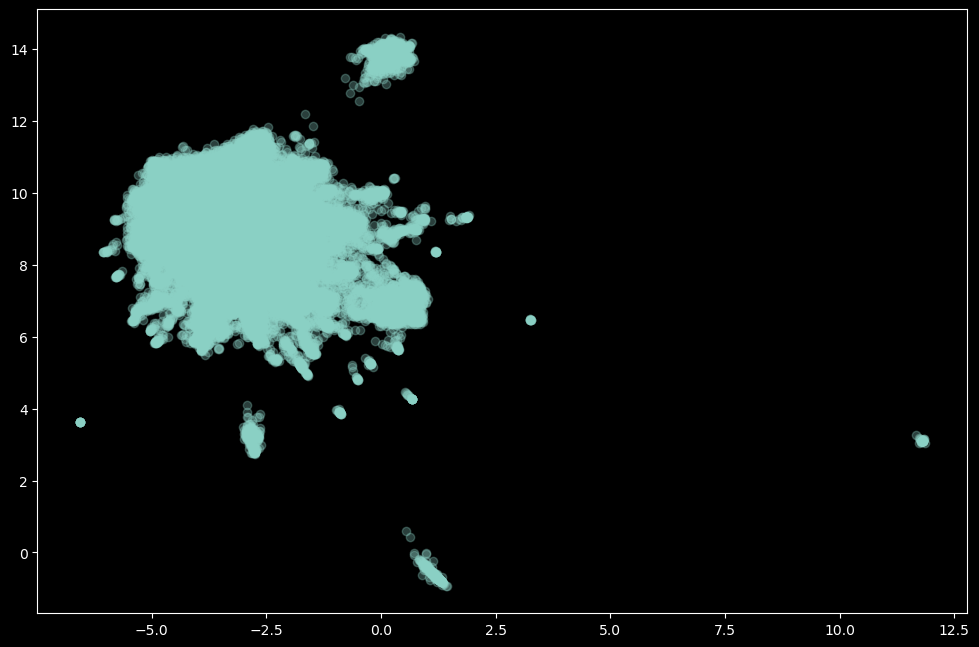

In [14]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.3)
plt.show()

In [12]:
strokeicd10s = set(['G43.609', 'G43.619', 'G43.601', 'G43.611', 'I60.00', 'I60.01', 'I60.02', 'I60.10', 'I60.11', 'I60.12', 'I60.2', 
                    'I60.30', 'I60.31', 'I60.32', 'I60.4', 'I60.50', 'I60.51', 'I60.52', 'I60.6', 'I60.7', 'I60.8', 'I60.9', 'I61.0', 
                    'I61.1', 'I61.2', 'I61.3', 'I61.4', 'I61.5', 'I61.6', 'I61.8', 'I61.9', 'I62.1', 'I62.00', 'I62.01', 'I62.02', 
                    'I62.03', 'I62.9', 'I63.02', 'I63.12', 'I63.22', 'I63.031', 'I63.032', 'I63.033', 'I63.039', 'I63.131', 'I63.132', 
                    'I63.133', 'I63.139', 'I63.231', 'I63.232', 'I63.233', 'I63.239', 'I63.011', 'I63.012', 'I63.013', 'I63.019', 'I63.111', 
                    'I63.112', 'I63.113', 'I63.119', 'I63.211', 'I63.212', 'I63.213', 'I63.219', 'I63.59', 'I63.09', 'I63.19', 'I63.59',
                    'I63.00', 'I63.10', 'I63.20', 'I63.29', 'I66.01', 'I66.02', 'I66.03', 'I66.09', 'I66.11', 'I66.12', 'I66.13', 'I66.19', 
                    'I66.21', 'I66.22', 'I66.23', 'I66.29', 'I66.3', 'I66.8', 'I66.9', 'I63.30', 'I63.311', 'I63.312', 'I63.313', 'I63.319', 
                    'I63.321', 'I63.322', 'I63.323', 'I63.329', 'I63.331', 'I63.332', 'I63.333', 'I63.339', 'I63.341', 'I63.342', 'I63.343', 
                    'I63.349', 'I63.39', 'I63.6', 'I63.40', 'I63.411', 'I63.412', 'I63.413', 'I63.419', 'I63.421', 'I63.422', 'I63.423',
                    'I63.429', 'I63.431', 'I63.432', 'I63.433', 'I63.439', 'I63.441', 'I63.442', 'I63.443', 'I63.449', 'I63.49', 'I63.50', 
                    'I63.511', 'I63.512', 'I63.513', 'I63.519', 'I63.521', 'I63.522', 'I63.523', 'I63.529', 'I63.531', 'I63.532', 'I63.533', 
                    'I63.539', 'I63.541', 'I63.542', 'I63.543', 'I63.549', 'I63.59', 'I63.8', 'I63.81', 'I63.89', 'I63.9', 'I67.89', 'I65.1', 
                    'I65.21', 'I65.22', 'I65.23', 'I65.29', 'I65.01', 'I65.02', 'I65.03', 'I65.09', 'I65.8', 'I65.9', 'I67.2', 'I67.81', 
                    'I67.82', 'I67.89', 'I67.1', 'I67.7', 'I68.2', 'I67.5', 'I67.6', 'G45.4', 'G46.3', 'G46.4', 'G46.5', 'G46.6', 'G46.7', 
                    'G46.8', 'I67.89', 'I68.0', 'I68.8', 'I67.9', 'G45.0', 'G45.8', 'G45.1', 'G45.2', 'G45.8', 'G46.0', 'G46.1', 'G46.2', 
                    'G45.9', 'I67.841', 'I67.848'])

In [14]:
with open("..\Justin\Stroke_Notes_13OCT21\docidtooldesticds.json", 'r') as infile:
    docidstoicds = json.load(infile)

In [15]:
strokecodefordocid = dict()
for docid,icds in docidstoicds.items():
    strokecode = False
    for icd in icds:
        if icd in strokeicd10s:
            strokecode = True
            break
    if strokecode:
        strokecodefordocid[docid] = 1
    else:
        strokecodefordocid[docid] = 0

In [16]:
strokecodebyindex = [strokecodefordocid[docid] for docid in docids]

In [17]:
len(strokecodebyindex)

29865

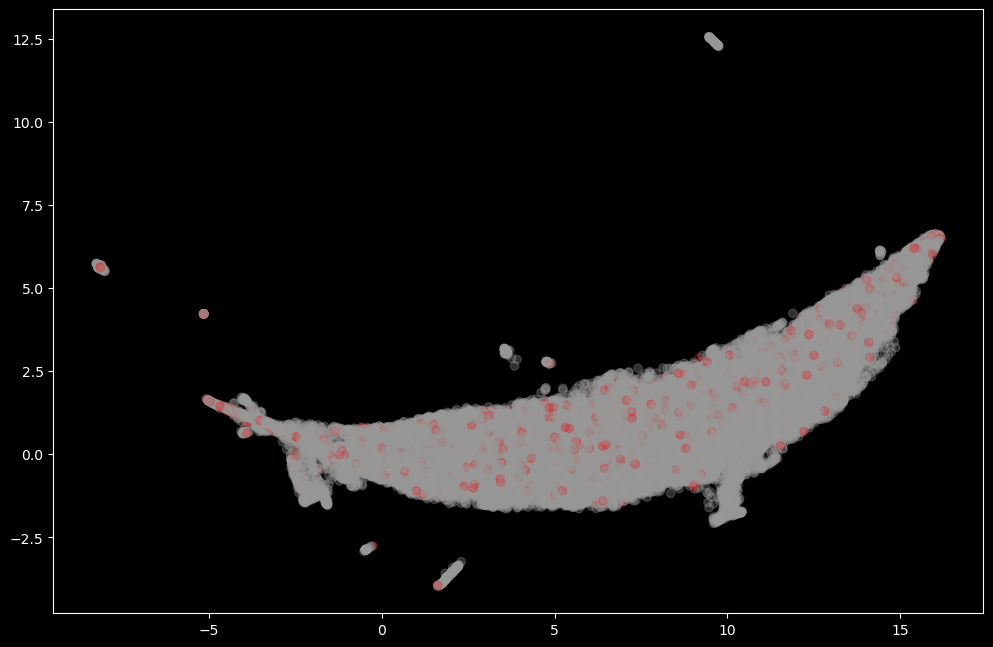

In [18]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding[:, 0], embedding[:, 1], c=strokecodebyindex, alpha=0.3, cmap='Set1')
plt.show()

In [19]:
dizzinessicd10s = ['H81.01', 'H81.02', 'H81.03', 'H81.09', 'H81.10', 'H81.11', 'H81.12', 'H81.13', 'H81.20', 'H81.21', 'H81.22', 'H81.23', 'H81.311', 
                   'H81.312', 'H81.313', 'H81.319', 'H81.391', 'H81.392', 'H81.393', 'H81.399', 'H81.4', 'H81.41', 'H81.42', 'H81.43', 'H81.49', 
                   'H81.8X1', 'H81.8X2', 'H81.8X3', 'H81.8X9', 'H81.90', 'H81.91', 'H81.92', 'H81.93', 'H83.01', 'H83.02', 'H83.03', 'H83.09', 'H83.11', 
                   'H83.12', 'H83.13', 'H83.19', 'H83.2X1', 'H83.2X2', 'H83.2X3', 'H83.2X9', 'H83.3X1', 'H83.3X2', 'H83.3X3', 'H83.3X9', 'H83.8X1', 
                   'H83.8X2', 'H83.8X3', 'H83.8X9', 'H83.90', 'H83.91', 'H83.92', 'H83.93', 'R42.']

In [20]:
dizzycodefordocid = dict()
for docid,icds in docidstoicds.items():
    dizzycode = False
    for icd in icds:
        if icd in dizzinessicd10s:
            dizzycode = True
            break
    if dizzycode:
        dizzycodefordocid[docid] = 1
    else:
        dizzycodefordocid[docid] = 0
        
dizzycodebyindex = [dizzycodefordocid[docid] for docid in docids]

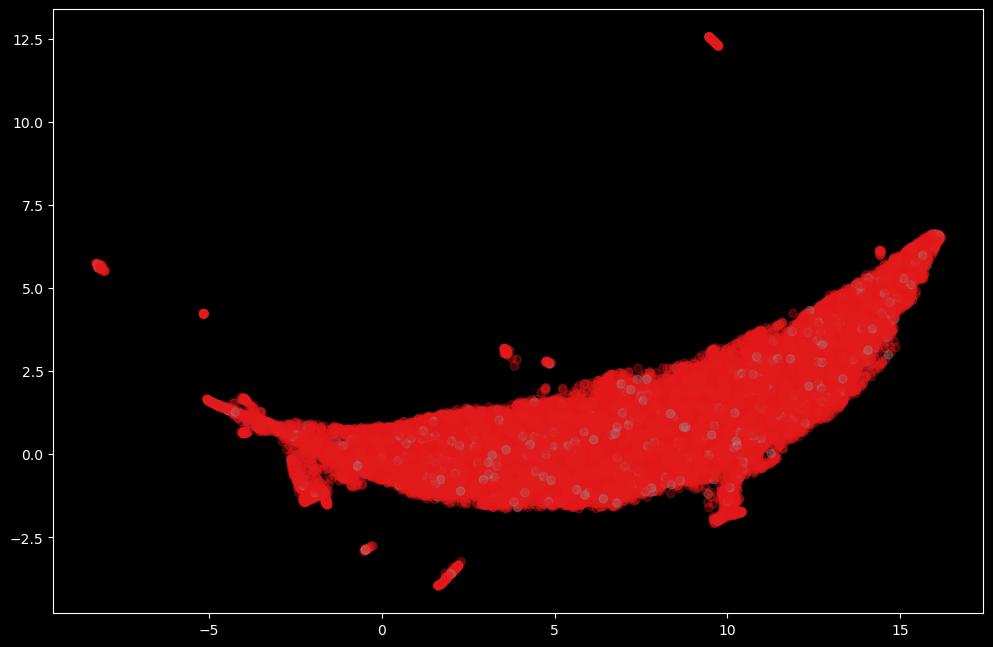

In [21]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding[:, 0], embedding[:, 1], c=dizzycodebyindex, alpha=0.3, cmap='Set1')
plt.show()

In [22]:
headacheicd10s = ['G43.001', 'G43.009', 'G43.011', 'G43.019', 'G43.101', 'G43.109', 'G43.111', 'G43.119', 'G43.401', 'G43.409', 'G43.411', 'G43.419', 
                  'G43.501', 'G43.509', 'G43.511', 'G43.519', 'G43.601', 'G43.609', 'G43.611', 'G43.619', 'G43.701', 'G43.709', 'G43.711', 'G43.719', 
                  'G43.801', 'G43.809', 'G43.811', 'G43.819', 'G43.821', 'G43.829', 'G43.831', 'G43.839', 'G43.901', 'G43.909', 'G43.911', 'G43.919', 
                  'G43.A0', 'G43.A1', 'G43.B0', 'G43.B1', 'G43.C0', 'G43.C1', 'G43.D0', 'G43.D1', 'G44.001', 'G44.009', 'G44.011', 'G44.019', 'G44.021', 
                  'G44.029', 'G44.031', 'G44.039', 'G44.041', 'G44.049', 'G44.051', 'G44.059', 'G44.091', 'G44.099', 'G44.1', 'G44.201', 'G44.209', 
                  'G44.211', 'G44.219', 'G44.221', 'G44.229', 'G44.301', 'G44.309', 'G44.311', 'G44.319', 'G44.321', 'G44.329', 'G44.40', 'G44.41', 
                  'G44.51', 'G44.52', 'G44.53', 'G44.59', 'G44.81', 'G44.82', 'G44.83', 'G44.84', 'G44.85', 'G44.89', 'R51.']

In [23]:
headachecodefordocid = dict()
for docid,icds in docidstoicds.items():
    headachecode = False
    for icd in icds:
        if icd in headacheicd10s:
            headachecode = True
            break
    if headachecode:
        headachecodefordocid[docid] = 1
    else:
        headachecodefordocid[docid] = 0
        
headachecodebyindex = [headachecodefordocid[docid] for docid in docids]

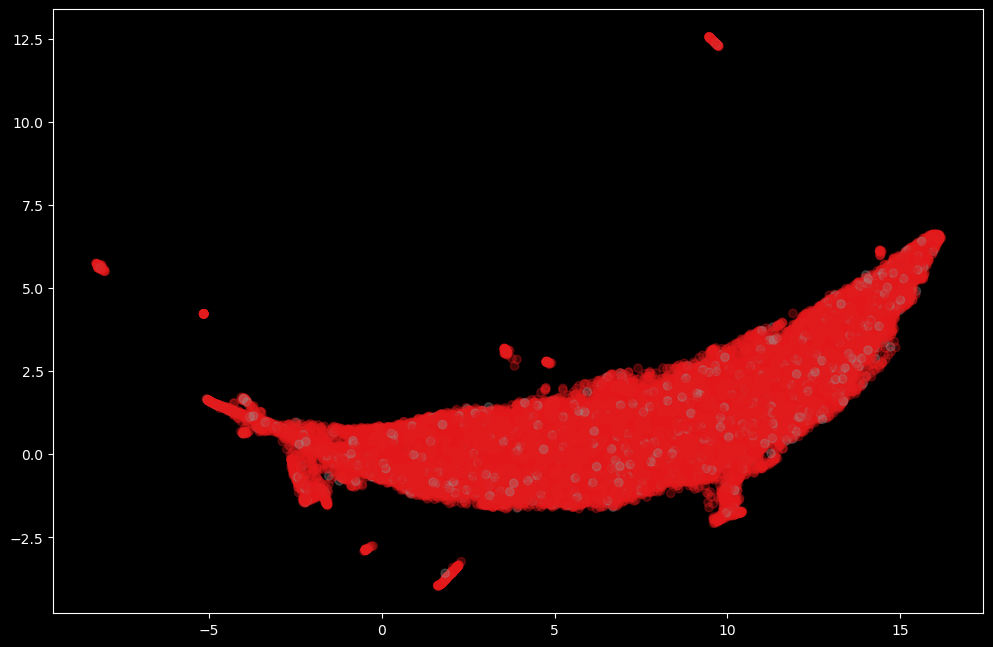

In [24]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding[:, 0], embedding[:, 1], c=headachecodebyindex, alpha=0.3, cmap='Set1')
plt.show()

In [25]:
with open("..\Justin\Stroke_Notes_13OCT21\cui_vectors_15_NOV_2021.json",'r') as infile:
    cuivectors = json.load(infile)

with open("..\Justin\Stroke_Notes_13OCT21\cuitranslate.json",'r') as infile:
    cuitranslate = json.load(infile)

In [26]:
for cui, plaintext in cuitranslate.items():
    if "Thalamic infarction" in plaintext:
        print(cui, plaintext)

C1611171 Thalamic infarction


In [27]:
tivector = np.asarray(cuivectors['C1611171'])

In [28]:
tivector

array([ 0.42594454, -0.14397429,  0.07087149, -0.06942312, -0.16818875,
        0.10874534, -0.21890861,  0.09732742,  0.48137149,  0.02035385,
       -0.02396235, -0.12488987,  0.00419138,  0.01031094,  0.00824842,
       -0.04263059, -0.10076194,  0.17311205,  0.23313838,  0.0453187 ,
        0.33072874, -0.02601496,  0.04553092, -0.01345649,  0.33648664,
        0.00278881, -0.26899961, -0.05775634, -0.05392291, -0.22660676,
        0.06135262,  0.1165446 ,  0.15865554, -0.10211556,  0.36293539,
       -0.14501716,  0.49677196, -0.03264319, -0.16717441,  0.45549774,
        0.06366181, -0.34352112,  0.06476977, -0.0929506 ,  0.0267948 ,
        0.11852137, -0.06205322,  0.25593552,  0.16937187,  0.05555532,
       -0.14466165,  0.10508003, -0.29663801,  0.01023356,  0.09101772,
       -0.08683736, -0.21762714,  0.00973662,  0.31772605,  0.07844514,
       -0.03132469,  0.01180329, -0.26079807,  0.28805611,  0.14364944,
       -0.14341281, -0.09698765, -0.13550711, -0.15799153,  0.08

In [29]:
ticosinesim = np.dot(tivector.reshape(1,100), docarray.T) / (np.linalg.norm(tivector) * np.linalg.norm(docarray, axis=1))

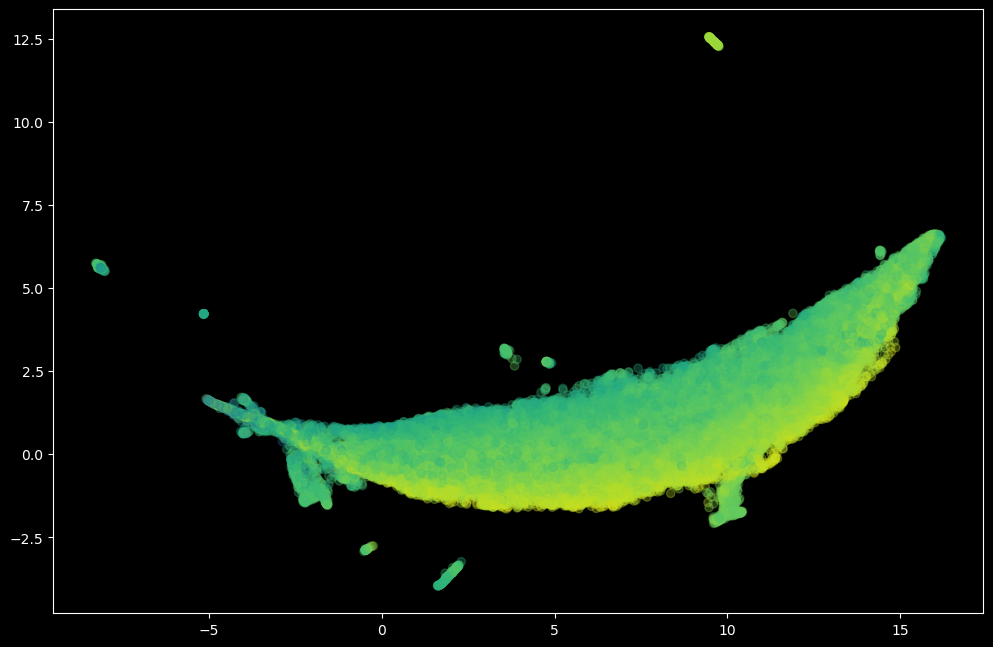

In [30]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding[:, 0], embedding[:, 1], c=ticosinesim, alpha=0.3, cmap='viridis')
plt.show()

In [31]:
for cui in cuivectors:
    try:
        if "posterior" in cuitranslate[cui] and "occlusion" in cuitranslate[cui]:
            print(cui, cuitranslate[cui])
    except KeyError:
        pass

C2144926 total atherosclerotic occlusion of posterior tibial artery
C1384764 occlusion; posterior cerebral artery, with infarction
C3836438 posterior inferior cerebellar artery occlusion with cerebral infarction
C4543240 Cerebrovascular accident due to occlusion of left posterior cerebral artery
C1384773 occlusion; communicating posterior artery
C2067939 PTCA right posterior descending artery complications total occlusion


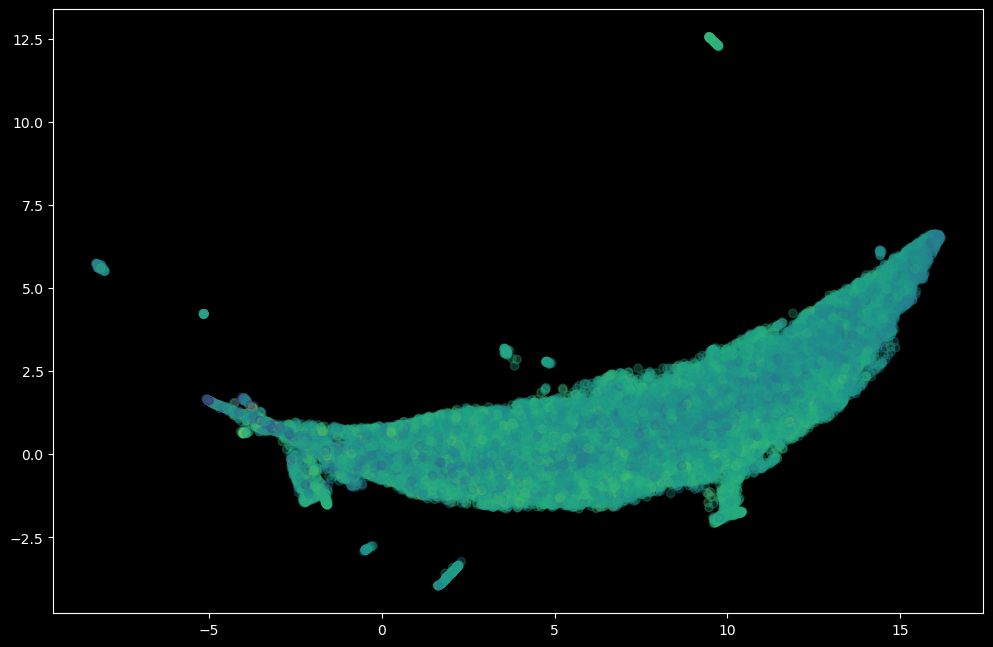

In [32]:
queryvector = np.asarray(cuivectors['C3836438'])
querysim = np.dot(queryvector.reshape(1,100), docarray.T) / (np.linalg.norm(queryvector) * np.linalg.norm(docarray, axis=1))
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding[:, 0], embedding[:, 1], c=querysim, alpha=0.3, cmap='viridis')
plt.show()

In [33]:
normReducer = umap.UMAP()
normDocArray = docarray / np.linalg.norm(docarray, axis=1).reshape(-1, 1)
normEmbedding = normReducer.fit_transform(normDocArray)

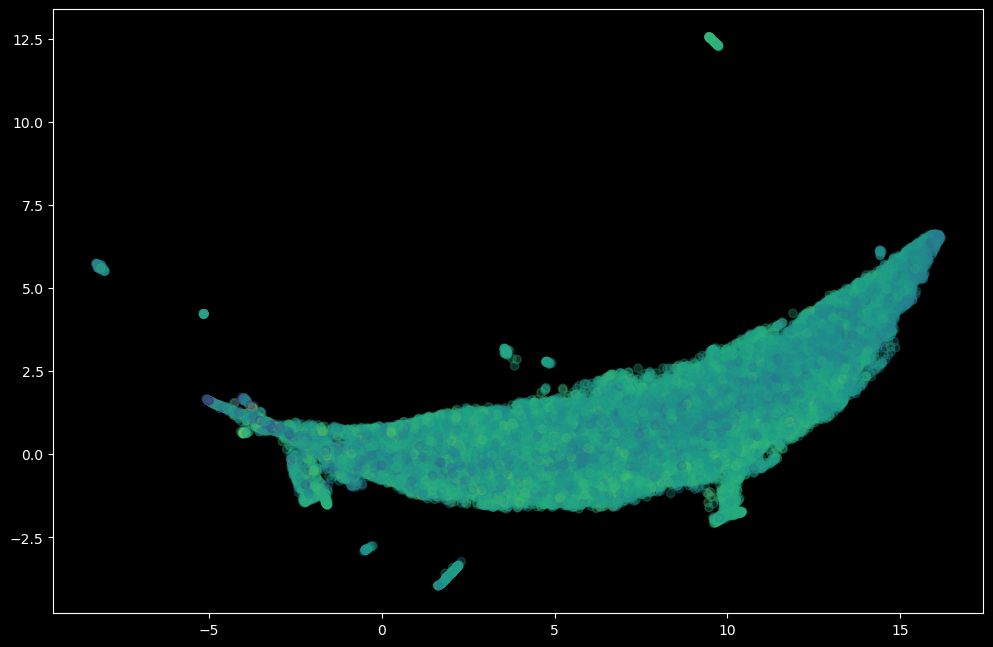

In [34]:
#UMAP can basically handle the non-normalized data as input; so we don't actually need to normalize like above.. this graph should be identical
#give or take some saturation to the previous graph.
queryvector = np.asarray(cuivectors['C3836438'])
querysim = np.dot((queryvector.reshape(1,100) / np.linalg.norm(queryvector)), normDocArray.T)
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding[:, 0], embedding[:, 1], c=querysim, alpha=0.3, cmap='viridis')
plt.show()

In [ ]:
np.asarray([x for x in docids])[np.where(embedding[:, 0] < -3.)[0]]

In [36]:
for cui in cuivectors:
    try:
        if "hemorrhagic" in cuitranslate[cui].lower() and "cva" in cuitranslate[cui].lower():
            print(cui, cuitranslate[cui])
    except KeyError:
        pass

C0742458 CNS BRAINSTEM PONTINE CVA HEMORRHAGIC
C0742073 CEREBRAL FRONTO_TEMPORAL CVA HEMORRHAGIC
C0742091 CEREBRAL PARIETAL CVA HEMORRHAGIC
C0742946 CVA ETIOLOGY HEMORRHAGIC ISCHEMIC
C0742099 CEREBRAL PARIETO_OCCIPTAL CVA HEMORRHAGIC
C0742453 CNS BASAL GANGLIA CVA HEMORRHAGIC
C0742030 CEREBELLAR CVA HEMORRHAGIC
C0742105 CEREBRAL TEMPORAL CVA HEMORRHAGIC
C0742492 CNS THALAMIC CVA HEMORRHAGIC
C0742945 CVA ETIOLOGY HEMORRHAGIC
C0742060 CEREBRAL FRONTAL CVA HEMORRHAGIC
C0742455 CNS BASAL GANGLIA PUTAMEN CVA HEMORRHAGIC


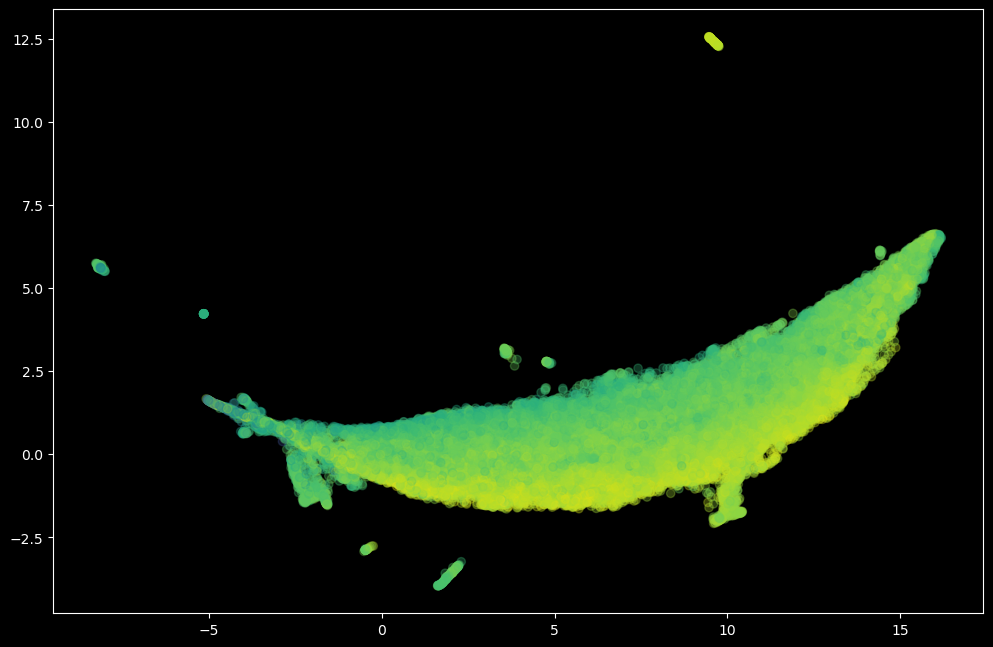

In [37]:
queryvector = np.asarray(cuivectors['C0742946'])
querysim = np.dot(queryvector.reshape(1,100), docarray.T) / (np.linalg.norm(queryvector) * np.linalg.norm(docarray, axis=1))
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding[:, 0], embedding[:, 1], c=querysim, alpha=0.3, cmap='viridis')
plt.show()